# Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Loading data

In [12]:
df = pd.read_csv("/app/dataset/40_features.csv")
X = df.drop(columns=["z_term1_1", "z_term1_2"]).values
y = df["z_term1_1"].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Distribuição de z_term1_1

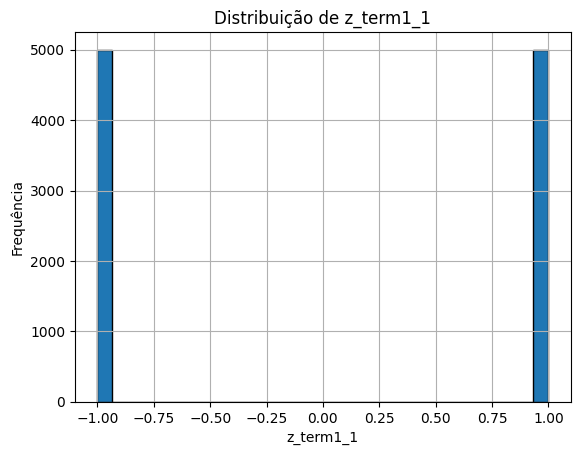

In [13]:
import matplotlib.pyplot as plt

plt.hist(y, bins=30, edgecolor='black')
plt.title("Distribuição de z_term1_1")
plt.xlabel("z_term1_1")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

# Matriz de correlação entre features e o target

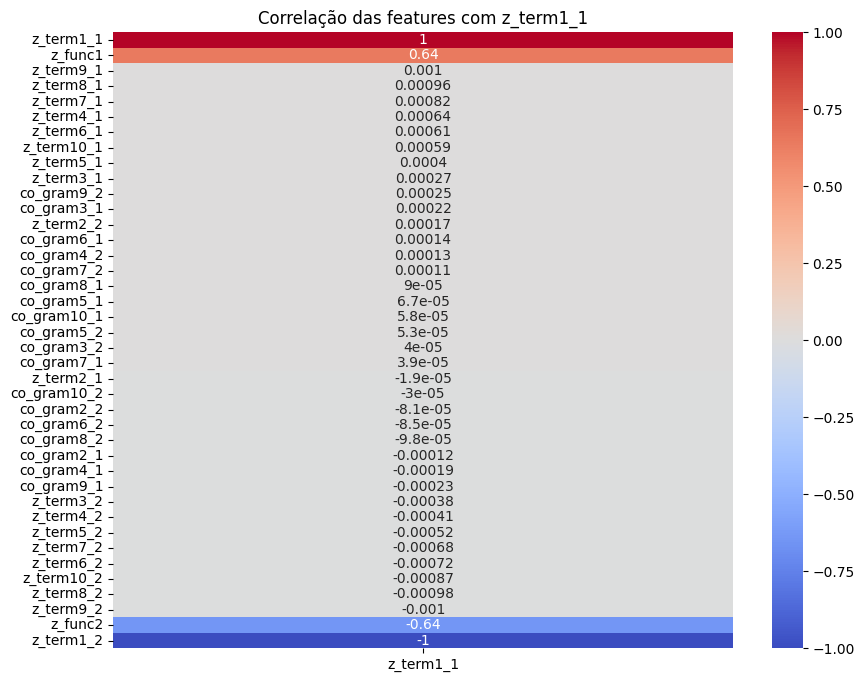

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

correlation = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation[["z_term1_1"]].sort_values(by="z_term1_1", ascending=False),
            annot=True, cmap="coolwarm", center=0)
plt.title("Correlação das features com z_term1_1")
plt.show()

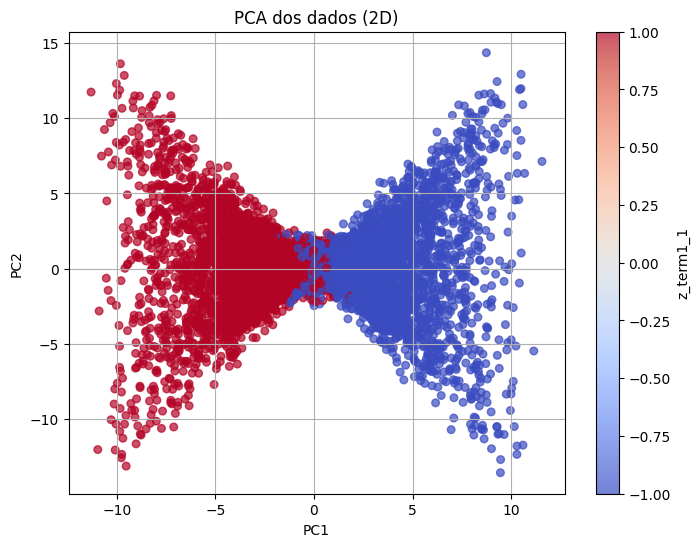

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(8, 6))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=30, alpha=0.7)
plt.colorbar(sc, label="z_term1_1")
plt.title("PCA dos dados (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# SVR

In [16]:
C_values = [0.1, 1.0, 10.0]
epsilon_values = [0.01, 0.1, 0.2]
results = []

for C in C_values:
    for epsilon in epsilon_values:
        svr = SVR(kernel='rbf', epsilon=epsilon, C=C)
        start_time = time.time()
        svr.fit(X_train, y_train)
        y_pred = svr.predict(X_test)
        end_time = time.time()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({
            "C": C,
            "epsilon": epsilon,
            "mse": mse,
            "r2": r2,
            "execution_time": end_time - start_time,
        })

df_results = pd.DataFrame(results)
print(df_results)


      C  epsilon       mse        r2  execution_time
0   0.1     0.01  0.011332  0.988668        2.349122
1   0.1     0.10  0.014218  0.985782        0.904515
2   0.1     0.20  0.030590  0.969410        0.674650
3   1.0     0.01  0.004765  0.995235        4.879308
4   1.0     0.10  0.008641  0.991359        0.755934
5   1.0     0.20  0.017098  0.982902        0.354686
6  10.0     0.01  0.004162  0.995838        8.980433
7  10.0     0.10  0.008289  0.991711        0.727992
8  10.0     0.20  0.017123  0.982877        0.332374
